<a href="https://colab.research.google.com/github/mattderri/CMP/blob/main/Compton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random

In [2]:
def sample():
    min=-math.pi #Limite inferiore della x
    max=math.pi #Limite superiore della x
    bound=2 #Massimo valore di f(x)=1+cos(x)^2
    while True: 
       x=random.uniform(min,max)
       y=random.uniform(0,bound)
       pdf=1+math.cos(x)**2
       if y<pdf:
           return math.cos(x)

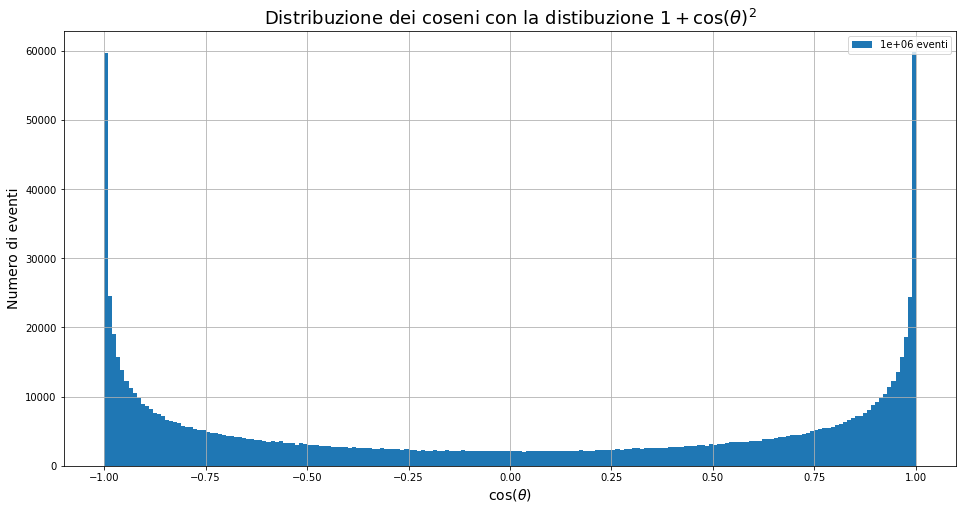

In [3]:
cos_theta=[sample() for i in range(1,int(1e6))]
bin=200
width=2/bin
plt.figure(figsize=(16,8))
plt.grid()
binned_data,bins,_=plt.hist(cos_theta,bins=bin,log=False,label='%.e eventi'% (len(cos_theta)))
plt.title(r'Distribuzione dei coseni con la distibuzione $1+\cos(\theta)^2$',fontsize=18)
plt.xlabel(r'$\cos(\theta)$',fontsize=14)
plt.ylabel('Numero di eventi',fontsize=14)
plt.legend(loc=1)

In [42]:
def E_f(E_i,cos_theta):
  m_e=511
  return E_i/(1+(E_i/m_e)*(1-cos_theta))

def Compton(initial_energy,number_of_photons):
  p=np.random.randint(0,101,number_of_photons)
  E_i=np.full(number_of_photons,fill_value=initial_energy)
  E_scat=[E_f(initial_energy,sample()) for i in p if i<=65]
  E_non_scat=[initial_energy for i in p if i>65]
  return E_scat,E_non_scat

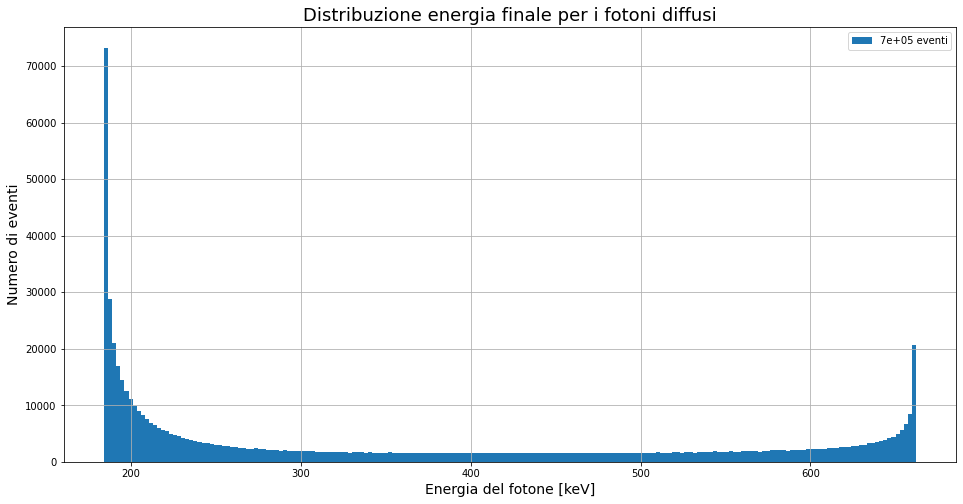

In [55]:
E_scat,E_non_scat=Compton(662,int(1e6))
bin=200
width=(np.amax(E_scat)-np.amin(E_scat))/bin
plt.figure(figsize=(16,8))
plt.grid()
binned_data,bins,_=plt.hist(E_scat,bins=bin,log=False,label='%.e eventi'% (len(E_scat)))
plt.title('Distribuzione energia finale per i fotoni diffusi',fontsize=18)
plt.xlabel('Energia del fotone [keV]',fontsize=14)
plt.ylabel('Numero di eventi',fontsize=14)
plt.legend(loc=1)